In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run scripts/helper.py

In [3]:
otto_train = load_csv('./train.csv/train.csv', 'id');

In [4]:
otto_test = load_csv('./test.csv/test.csv', 'id')

In [5]:
X = otto_train[otto_train.columns[:-1]]
y = get_encoded_labels(get_response(otto_train, 'target'))

In [6]:
X.shape, y.shape

((61878, 93), (61878,))

In [7]:
def unique_values(df):
    columns = df.columns
    for column in columns:
        if len(df[column].unique()) <= 15:
            print 'Column %s should be categorical' %(column)

In [8]:
unique_values(otto_test)

Column feat_5 should be categorical
Column feat_6 should be categorical


In [9]:
unique_values(otto_train)

Column feat_5 should be categorical
Column feat_6 should be categorical
Column feat_21 should be categorical
Column target should be categorical


In [10]:
# lets explore this variable's relationship with other variables
otto_train['Y'] = y
del otto_train['target']

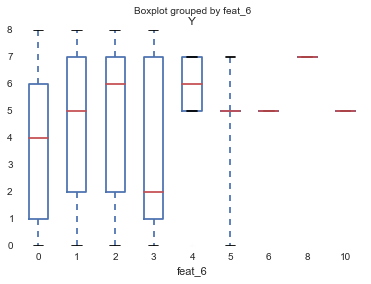

In [11]:
otto_train.boxplot(column='Y', by='feat_6');

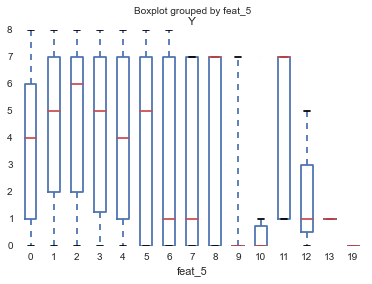

In [12]:
otto_train.boxplot(column='Y', by='feat_5');

In [14]:
# max value per feature
max_values_train = otto_train.apply(np.max)

In [15]:
max_values_test = otto_test.apply(np.max)

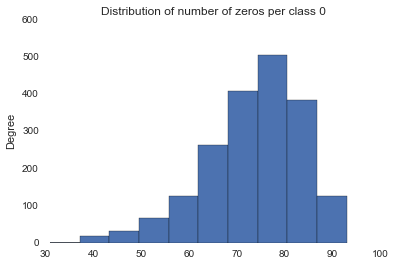

In [25]:
# lets plot to see distribution of number of zeroes per class
otto_train[otto_train.Y == 0].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 0');

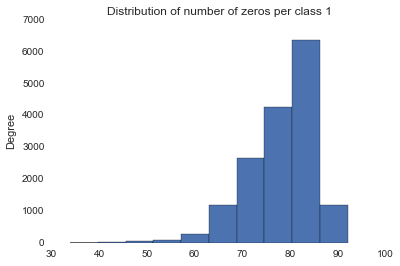

In [26]:
otto_train[otto_train.Y == 1].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 1');

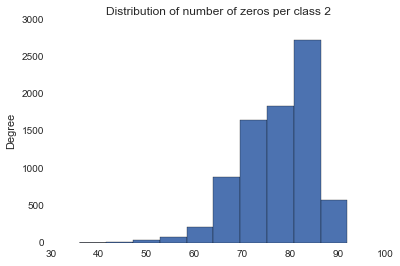

In [27]:
otto_train[otto_train.Y == 2].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 2');

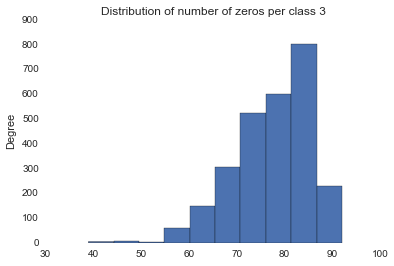

In [28]:
otto_train[otto_train.Y == 3].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 3');

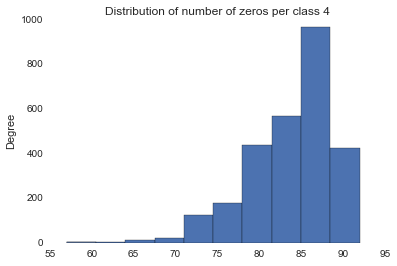

In [29]:
otto_train[otto_train.Y == 4].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 4');

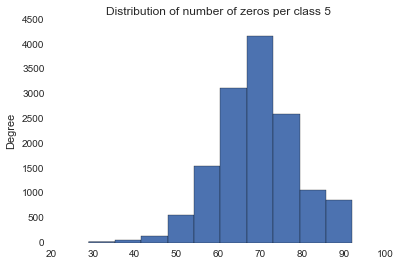

In [30]:
otto_train[otto_train.Y == 5].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 5');

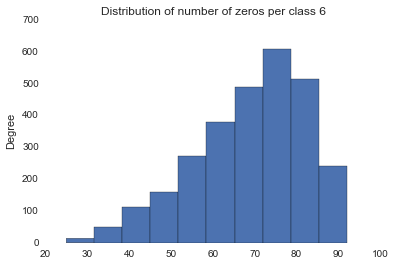

In [31]:
otto_train[otto_train.Y == 6].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 6');

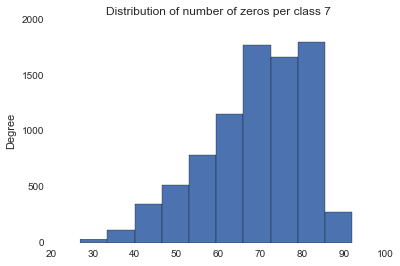

In [32]:
otto_train[otto_train.Y == 7].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 7');

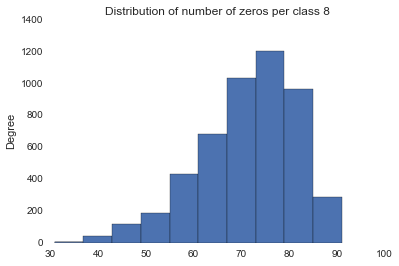

In [33]:
otto_train[otto_train.Y == 8].apply(lambda x: list(x).count(0), axis=1).plot(kind='hist');
plt.title('Distribution of number of zeros per class 8');

### Looking at above plots we can deduce that on average in each class more than 70 features are zeros.

In [54]:
# lets group by the class values and then analyze the features
otto_group = otto_train.groupby('Y')

In [133]:
otto_group.std()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
Y,,,,,,,,,,,,,,,,,,,,,
0,1.233120,0.486785,0.504259,0.514732,1.360870,0.399726,1.405737,4.535890,0.562193,1.143812,...,5.266806,0.807987,1.192133,1.244464,0.884089,1.263160,1.486889,2.923120,1.089490,0.554151
1,1.216319,0.162246,0.377090,0.397766,0.322874,0.138529,0.185736,0.667391,4.556101,0.700827,...,0.063406,1.958898,2.380381,0.631050,2.488532,0.997963,0.321021,0.136458,0.628273,0.235389
2,1.051747,0.254950,0.392675,0.378344,0.235783,0.150710,0.241024,0.721264,6.186584,0.910071,...,0.061152,3.523730,3.242621,0.491121,3.314340,1.595611,0.395148,0.150216,0.336128,0.208480
3,2.340516,0.125761,0.369988,0.503885,0.327372,0.131540,0.188968,0.636429,0.926791,1.193683,...,0.066724,3.127369,4.253383,0.625404,3.308436,0.537569,0.284586,0.189088,0.721737,0.214945
4,0.170250,0.243421,0.297979,0.325347,0.221181,0.073814,0.060324,0.699720,1.008615,0.170822,...,0.046761,0.232167,0.206960,0.353060,0.296335,0.295508,0.249890,0.400913,0.807746,0.131821
5,0.905458,0.935932,5.132800,3.922624,0.307500,0.239492,0.451895,0.916082,0.869623,0.655960,...,0.420191,0.602201,1.349765,2.763248,0.596195,1.190350,1.066195,0.689685,1.062770,2.409797
6,1.011156,1.782124,0.660820,0.825618,0.273439,0.213174,1.196566,1.531603,1.253719,2.402574,...,0.112255,1.925634,6.644270,1.805447,2.278833,1.160045,1.831478,1.407438,0.544345,0.606235
7,2.688205,2.767463,2.352528,4.844506,0.609569,0.332949,2.386486,1.286663,1.719352,1.626790,...,1.693181,0.898181,0.855357,0.877341,0.699123,2.620181,11.367142,0.859595,0.971867,0.565089
8,1.750467,0.320070,0.631178,0.620475,0.423509,0.145427,0.449941,6.037428,0.841937,0.976787,...,0.112370,0.662981,1.913171,1.653888,0.624167,1.951070,0.438395,6.467420,1.927792,0.353399


In [59]:
# lets add the mean of all the features of a training example as another feature
otto_train['mean_features'] = otto_train[otto_train.columns[:-1]].mean(axis=1)

In [60]:
otto_train.shape

(61878, 95)

In [62]:
otto_train.columns[-3:]

Index([u'feat_93', u'Y', u'mean_features'], dtype='object')

In [12]:
columns = list(otto_train.columns[:-2])

In [13]:
X, y = get_smaller_dataset(otto_train[columns], otto_train.Y, 500)

In [14]:
from sklearn.cross_validation import train_test_split

Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.1, random_state=0)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit

In [ ]:
# cross-validation
clf = GradientBoostingClassifier(n_estimators=100)
cv = ShuffleSplit(Xt.shape[0], n_iter=5, test_size=.2, random_state=0)

test_scores = cross_val_score(clf, Xt, yt, n_jobs=-1,scoring='log_loss')

In [ ]:
# cross-validation
cv = 

In [127]:
clf = GradientBoostingClassifier(n_estimators=100)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid', cv=2)
sig_clf.fit(Xt, yt)
sig_clf_probs = sig_clf.predict_proba(Xv)
sig_score = log_loss(yv, sig_clf_probs)

In [128]:
print 'score without calibration {0:.3f}'.format(score)

score without calibration 0.720


In [129]:
print 'score with calibration {0:.3f}'.format(sig_score)

score with calibration 0.783


In [15]:
print 'Train score ', svc.score(Xt, yt)

Train score  0.87845


In [16]:
print 'Test score ', svc.score(Xv, yv)

Test score  0.776444711058


In [100]:
from sklearn.metrics import log_loss

In [103]:
print 'Log loss score on train set {0:.3f}'.format(log_loss(yt, svc.predict_proba(Xt)))

Log loss score on train set 0.388


In [104]:
print 'Log loss score on test set {0:.3f}'.format(log_loss(yv, svc.predict_proba(Xv)))

Log loss score on test set 0.589
